# MUSIC SIGNAL ANALYSIS


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display   #for loading and visualizing audio files
import IPython.display as ipd   #to play audio
import matplotlib.style as ms
import numpy as np
ms.use('seaborn-muted')

In [4]:
x_classical,sr=librosa.load("/home/ashita/ML-Project2021/datasets/GTZAN/classical/classical.00000.wav",duration = 30)
x_metal,sr=librosa.load("/home/ashita/ML-Project2021/datasets/GTZAN/metal/metal.00000.wav",duration = 30)

print ("Overview of the array of samples")
print("Sampling Rate: ",sr)
print("For Metal song:(size={})\n{}:\n ".format(x_metal.shape,x_metal))
print("For Classical song:(size={})\n{}".format(x_classical.shape,x_classical))

Overview of the array of samples
Sampling Rate:  22050
For Metal song:(size=(661500,))
[-0.12237549 -0.04919434  0.04440308 ...  0.0324707  -0.10717773
 -0.11560059]:
 
For Classical song:(size=(661500,))
[-0.02008057 -0.01748657  0.00418091 ...  0.02758789  0.03158569
  0.03356934]


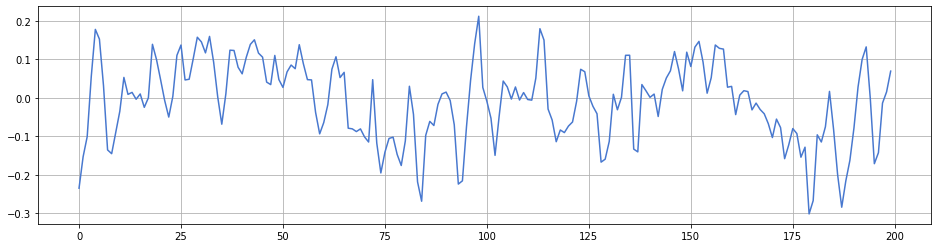

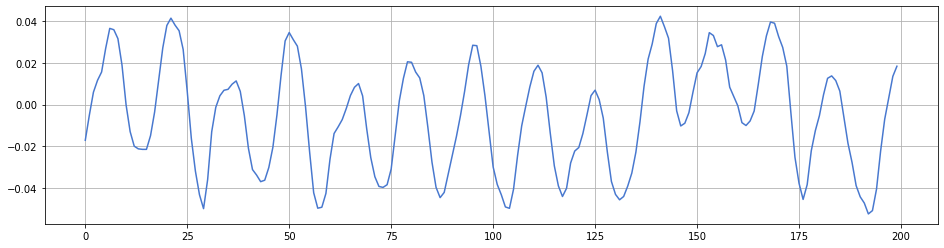

In [5]:
def zoomed_wave(signal,name):
    start = 1000
    end = 1200
    plt.figure(name,figsize=(16,4))
    plt.plot(signal[start:end])
    plt.grid()
    plt.show()
zoomed_wave(x_metal,'metal')
zoomed_wave(x_classical,'classical')

In [6]:
ipd.Audio(x_metal, rate=sr)

In [7]:
ipd.Audio(x_classical, rate=sr)

## We got 661504 samples with 22.05KHZ sampling rate for each song.
## Every element in that array is a sample from the audio.

# WAVEPLOT - TIME DOMAIN

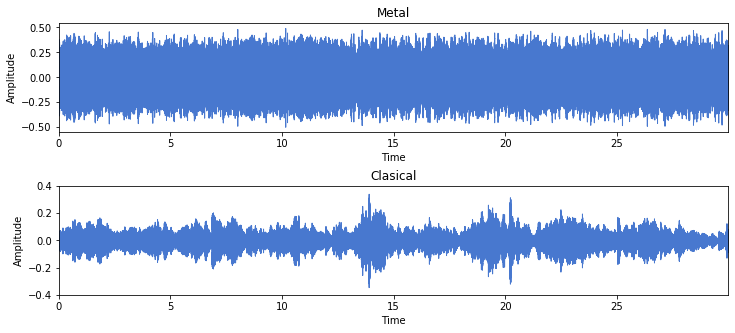

In [16]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2, 1, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_metal,sr)
plt.title('Metal')
plt.subplot(2, 1, 2)
plt.ylim(-0.4,0.4)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_classical,sr)
plt.title('Clasical')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/waveplot2.png")

We can see the difference in the waveplots of two different signals  but these plots can give very less information.
Limitations of Time domain :

Solution:Fourier Transform to get features in frequncey domain


## FOURIER TRANSFORM

In [9]:
ipd.display(ipd.Image(url='https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif'))

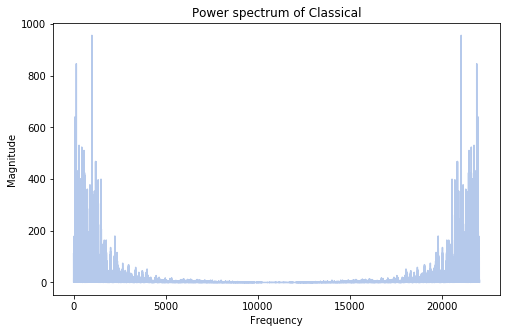

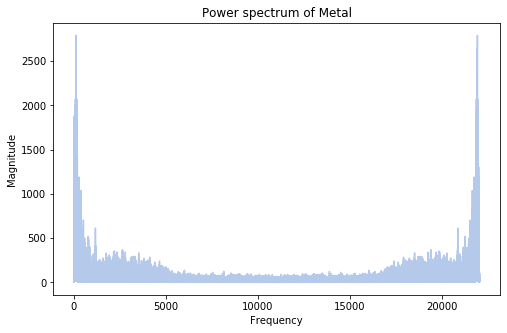

In [10]:
FIG_SIZE = (8,5)
def fft(signal,sample_rate,name):
    # FFT -> power spectrum
    # perform Fourier transform
    fft = np.fft.fft(signal)

    # calculate abs values on complex numbers to get magnitude
    spectrum = np.abs(fft)

    # create frequency variable
    f = np.linspace(0, sample_rate, len(spectrum))

    # if YOU take half of the spectrum and frequency
    # left_spectrum = spectrum[:int(len(spectrum)/2)]
    # left_f = f[:int(len(spectrum)/2)]

    # plot spectrum
    plt.figure(figsize=FIG_SIZE)
    plt.plot(f, spectrum, alpha=0.4)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
fft(x_classical,sr,'classical')
plt.title("Power spectrum of Classical")
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/PowerSpectrum1.png")
fft(x_metal,sr,'metal')
plt.title("Power spectrum of Metal")
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/PowerSpectrum2.png")

We got frequency information of signals but lost time information.
To get both use STFT.

## STFT(Short time Fourier Transform):
- Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a spectrum over an entire 10-minute song.
- With STFT, we break up the signal into dicsrete windows.
- We use a window fucntion such as Polynomial, Hanning, Hamming...
- Each signal within a window is a stationary signal.
- computes several FFT  at different intervals
- preserves time information
- fixed frame size
- After FFT,gives spectrogram(time + frequency+ magnitude)
### Some terms:
- Frame Length: The number of samples in a frame.
- Hop Length: The length between frames. (in samples)
- Window Size: Number of samples in each window.

## Spectrogram
- A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
- A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.
- We can display a spectrogram using. *librosa.display.specshow*.

STFT hop length duration of metal is: 0.023219954648526078s
STFT window duration of metal is: 0.09287981859410431s
STFT hop length duration of classical is: 0.023219954648526078s
STFT window duration of classical is: 0.09287981859410431s


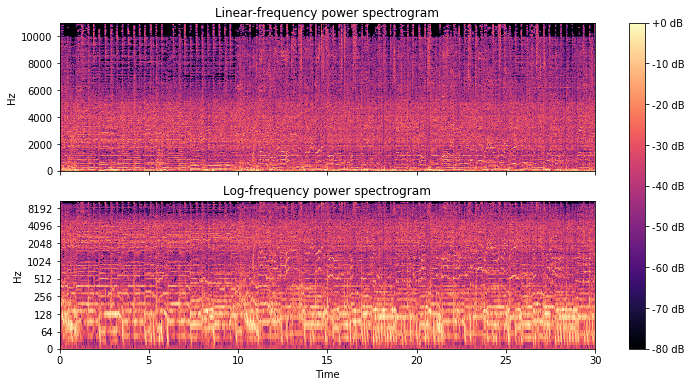

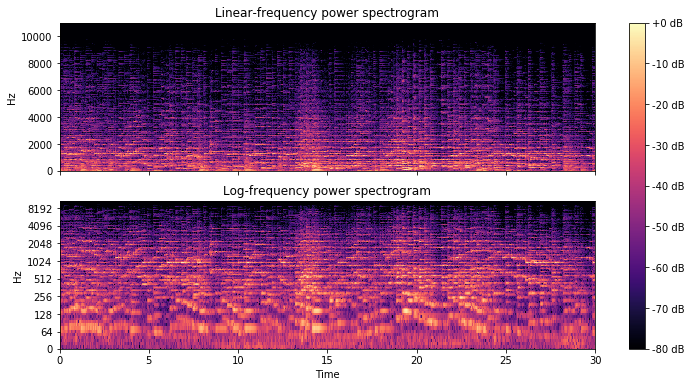

In [11]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
def stft_spectrogram(signal,sample_rate, name):
    # STFT -> spectrogram
    fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(12,6))

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration of {} is: {}s".format(name,hop_length_duration))
    print("STFT window duration of {} is: {}s".format(name,n_fft_duration))

    # perform stft
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft)
    # log and linear Spectrogram
    Db1 = librosa.amplitude_to_db(spectrogram, ref=np.max)
    Db2 = librosa.amplitude_to_db(spectrogram, ref=np.max)

    img = librosa.display.specshow(Db1, sr = sr, y_axis='linear', x_axis='time', ax=ax[0])
    librosa.display.specshow(Db2, sr=sr, hop_length = hop_length, y_axis='log', x_axis='time', ax=ax[1])
    plt.title(name)
    ax[0].set(title='Linear-frequency power spectrogram')
    ax[0].label_outer()
    ax[1].set(title='Log-frequency power spectrogram')
    ax[1].label_outer()
    fig.colorbar(img, ax=ax, format="%+2.f dB")



stft_spectrogram(x_metal,sr,'metal')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/stft_spectrogram1.png")
stft_spectrogram(x_classical,sr,'classical')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/stft_spectrogram2.png")


## Mel Frequency Cepstral Coefficients(MFCCs)
- Capture timbral/textual aspects of sound
- frequency domain feature
- 13 TO 40 coefficents
- Calculated at each frame

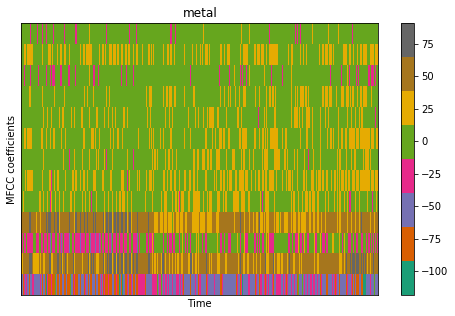

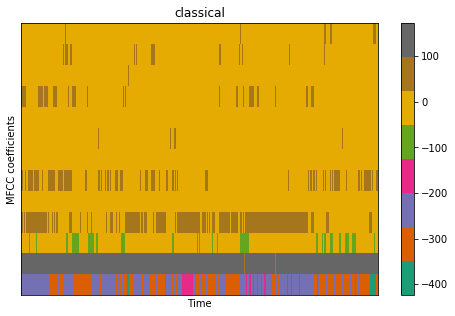

In [12]:
def mfcc_plots(signal,sample_rate,name):
    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    # display MFCCs
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length,cmap='Dark2')
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title(name)
    plt.show()

mfcc_plots(x_metal,sr,'metal')
#plt.savefig("/home/ashita/ML-Project2021/datasets/saved/mfcc1.png")
mfcc_plots(x_classical,sr,'classical')
#plt.savefig("/home/ashita/ML-Project2021/datasets/saved/mfcc2.png")

## Harmonics and Perceptrual
- Harmonics are characteristichs that human years can't distinguish (represents the sound color)
- Perceptrual understanding shock wave represents the sound rhythm and emotion

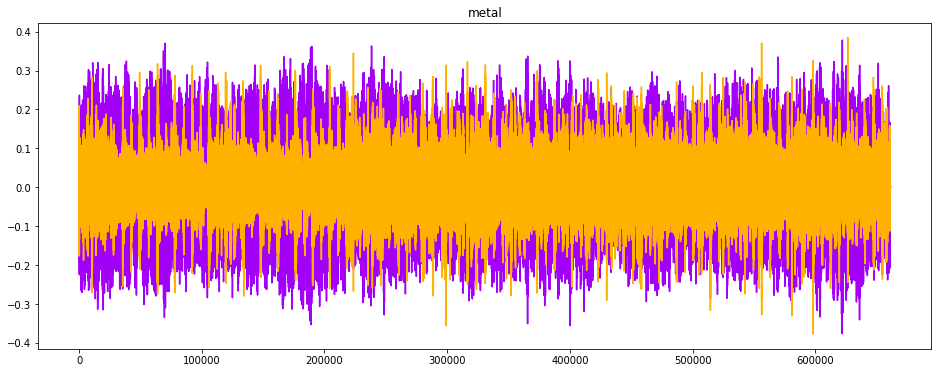

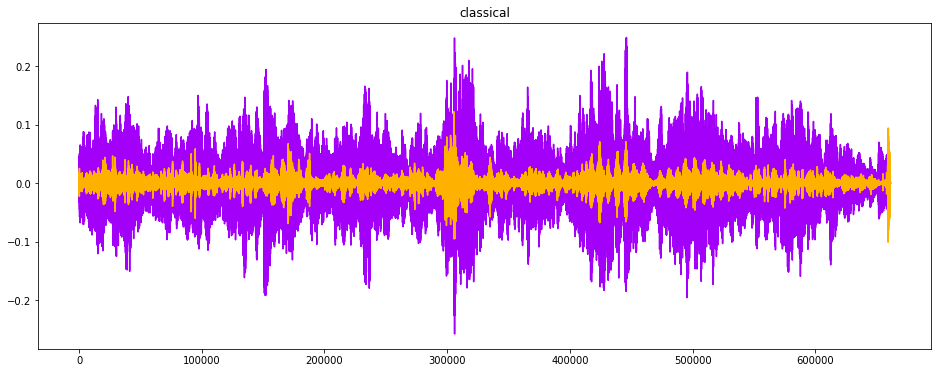

In [13]:
def harmonics(signal,sr,name):
    audio_file, _ = librosa.effects.trim(signal)
    y_harm, y_perc = librosa.effects.hpss(audio_file)
    plt.figure(figsize = (16, 6))
    plt.plot(y_harm, color = '#A300F9')
    plt.plot(y_perc, color = '#FFB100')
    plt.title(name)
harmonics(x_metal,sr,'metal')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/harmonic1.png")
harmonics(x_classical,sr,'classical')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/harmonic2.png")

## CHROMA FEATURES

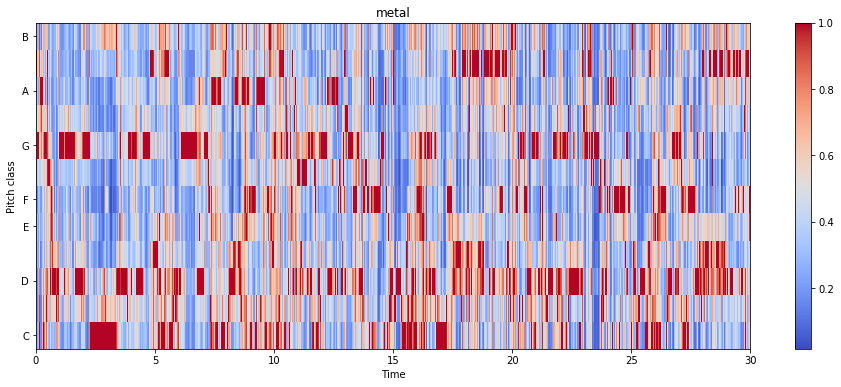

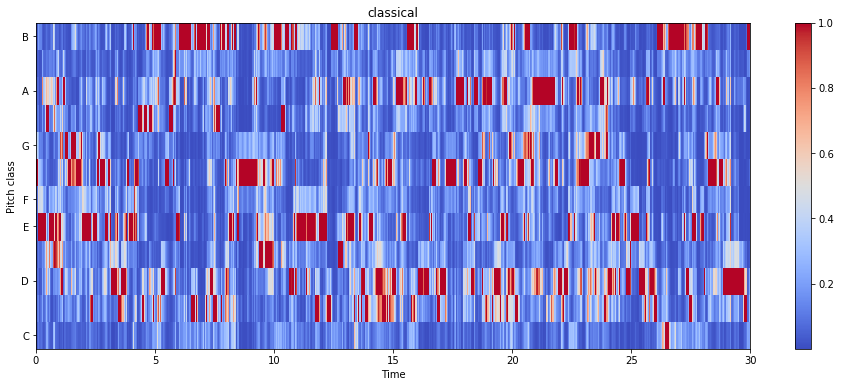

In [14]:
def chroma(signal,sr,name):
    chroma = librosa.feature.chroma_stft(signal, sr=sr)
    plt.figure(figsize=(16,6))
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title(name)
chroma(x_metal,sr,'metal')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/chroma1.png")
chroma(x_classical,sr,'classical')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/chroma2.png")

## Rhythm Features:

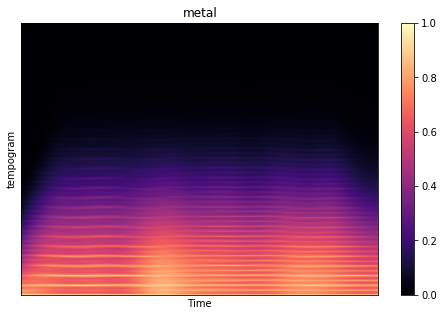

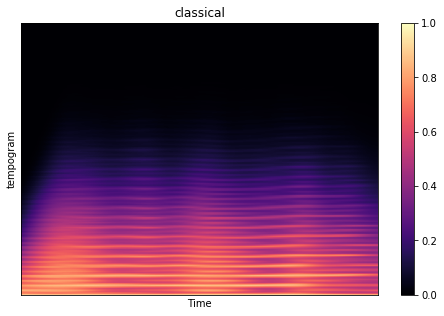

In [15]:
def rhythm(y,sr,name):
    oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)  #Compute the tempogram: local autocorrelation of the onset strength envelope.
    plt.figure(figsize=FIG_SIZE)
    tempogram_test = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
    librosa.display.specshow(tempogram_test, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("tempogram")
    plt.colorbar()
    plt.title(name)
    ac_global = librosa.autocorrelate(oenv, max_size=tempogram_test.shape[0])   #Compute global onset autocorrelation
    ac_global_test = librosa.util.normalize(ac_global)                          #maybe not needed
    tempo_test = librosa.beat.tempo(onset_envelope= oenv, sr=sr, hop_length=hop_length)[0]

rhythm(x_metal,sr,'metal')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/rhythm1.png")
rhythm(x_classical,sr,'classical')
plt.savefig("/home/ashita/ML-Project2021/datasets/saved/rhythm2.png")


## Useable Features for Classification
### Spectral (14)

- melspec = librosa.feature.melspectrogram(y=y, sr=sr)
- chroma_stft = librosa.feature.chroma_stft(S = Spec, sr=sr, n_chroma=12)
- chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=12)
- chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr, n_chroma=12)
- mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
- rms = librosa.feature.rms(y=y, S = melspec_test)
- spec_cent = librosa.feature.spectral_centroid(y= y, sr=sr)
- spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
- contrast = librosa.feature.spectral_contrast(S= Spec, sr=sr)
- flatness = librosa.feature.spectral_flatness(y=y)
- rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
- poly = librosa.feature.poly_features(S=Spec, order=0)
- tonnetz = librosa.feature.tonnetz(y=yharm, sr=sr)
- ZCR = librosa.feature.zero_crossing_rate(y=y)

### Rhythm (1)

- tempo = librosa.beat.tempo(onset_envelope= oenv, sr=sr,hop_length=hop_length)[0] (same as below)

### Beats & tempo (2-3)

- tempo, beats = librosa.beat.beat_track(y=y, sr=sr) (beats MAYBE)
- pulse = librosa.beat.plp(onset_envelope=oenv, sr=sr)

### Spectogram Decomposition (1-2)

- comps, acts = librosa.decompose.decompose(S=S1, n_components=1) (comps MAYBE)
